<a href="https://colab.research.google.com/github/wgrgwrght/Hello_World_WSI/blob/main/DeepFeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloads

In [ ]:
!git clone https://github.com/TissueImageAnalytics/tiatoolbox.git

fatal: destination path 'tiatoolbox' already exists and is not an empty directory.


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
cd tiatoolbox

/content/tiatoolbox/tiatoolbox


In [ ]:
!conda create -n tiatoolbox-dev python=3.8 # select version of your choice
!conda activate tiatoolbox-dev
!pip install -r requirements_dev.txt

Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local/envs/tiatoolbox-dev

  added / updated specs:
    - python=3.8


The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge None
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu None
  bzip2              conda-forge/linux-64::bzip2-1.0.8-h7f98852_4 None
  ca-certificates    conda-forge/linux-64::ca-certificates-2022.12.7-ha878542_0 None
  ld_impl_linux-64   conda-forge/linux-64::ld_impl_linux-64-2.39-hcc3a1bd_1 None
  libffi             conda-forge/linux-64::libffi-3.4.2-h7f98852_5 None
  libgcc-ng          conda-forge/linux-64::libgcc-ng-12.2.0-h65d4601_19 None
  libgomp            conda-forge/linux-64::libgomp-12.2.0-h65d4601_19 N

In [ ]:
!conda activate tiatoolbox-dev


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail -n 1
!pip install git+https://github.com/TissueImageAnalytics/tiatoolbox.git@develop | tail -n 1

print("Installation is done.")

0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
  Running command git clone --filter=blob:none --quiet https://github.com/TissueImageAnalytics/tiatoolbox.git /tmp/pip-req-build-7xxo8e7z
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.10.0+cu113 requires torch==1.10.0, but you have torch 1.13.1 which is incompatible.
Installation is done.


In [ ]:
!pip install -U numpy
!pip install umap-learn ujson
!pip uninstall -y torch-scatter torch-sparse torch-geometric
!pip uninstall -y torch
!pip install torch==1.10.0+cu113 torchvision==0.11.1+cu113 torchaudio==0.10.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
Found existing installation: torch-geometric 

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
import os

print(sys.version)

py_file_location = "/content/drive"
sys.path.append(os.path.abspath(py_file_location))

3.8.16 (default, Dec  7 2022, 01:12:13) 
[GCC 7.5.0]


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
plt.rcParams.update({"font.size": 5})

In [ ]:
from tiatoolbox.tools import patchextraction
from tiatoolbox.utils.misc import imread
from tiatoolbox.utils.misc import read_locations
from tiatoolbox.wsicore.wsireader import WSIReader
from tiatoolbox.models.engine.nucleus_instance_segmentor import NucleusInstanceSegmentor
from tiatoolbox.tools.patchextraction import PatchExtractor
from tiatoolbox.utils.visualization import plot_graph
from tiatoolbox.wsicore.wsireader import WSIReader
from tiatoolbox.tools.graph import SlideGraphConstructor

import numpy as np
import cv2

from pprint import pprint

In [ ]:
# Python standard library imports
from collections import OrderedDict
import copy
import os
import pathlib
import random
import shutil
import sys
from typing import Callable, List, Tuple
import warnings

# Third party imports
import joblib
import pandas as pd
from PIL import Image
from torchvision import transforms
from PIL.Image import new
import torch
from tqdm import tqdm

# Use ujson as replacement for default json because it's faster for large JSON
import ujson as json

warnings.filterwarnings("ignore")

# ! save_yaml, save_as_json => need same name, need to factor out jsonify
from tiatoolbox.utils.misc import imread, save_as_json

mpl.rcParams["figure.dpi"] = 300  # for high resolution figure in notebook

In [ ]:
SEED = 5
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

In [ ]:
from skimage.exposure import equalize_hist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from torch_geometric.data import Data

# Get Patches

In [ ]:
file_path = '/content/drive/MyDrive/Test images/X19-588_NEG.mrxs'

wsi = WSIReader.open(file_path)

# Show Mask
wsi_mask = wsi.tissue_mask(resolution=1, units="power")

# * Generate patch coordinates (in xy format)
wsi_shape = wsi.slide_dimensions(resolution=0.25, units="mpp")

In [ ]:
# extract patches
from tiatoolbox.tools.patchextraction import get_patch_extractor

# Extrct Patches
size_patch = 512

fixed_patch = patchextraction.get_patch_extractor(
    input_img=wsi,  
    input_mask=wsi_mask,
    method_name="slidingwindow",  
    patch_size=(
        size_patch,
        size_patch,
    ),  
    stride=(size_patch, size_patch), 
    min_mask_ratio = 0.15
)

# Get Features for Patch

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05,

In [ ]:
def get_feats(im):

  input_image = Image.fromarray(np.uint8(im))

  preprocess = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

  input_tensor = preprocess(input_image)
  input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

  # move the input and model to GPU for speed if available
  if torch.cuda.is_available():
      input_batch = input_batch.to('cuda')
      model.to('cuda')

  with torch.no_grad():
      output = model(input_batch)

  return np.array(output[0])

In [ ]:
feats = []
for box in tqdm(fixed_patch.coordinate_list):
  img = wsi.read_bounds(box, resolution=0, units="level")
  feats.append(get_feats1(img))

100%|██████████| 3854/3854 [13:50<00:00,  4.64it/s]


In [ ]:
# Save Features
np.save("/content/drive/MyDrive/Test images/0.position.npy", fixed_patch.coordinate_list)
np.save("/content/drive/MyDrive/Test images/0.features.0.npy", feats)

# Load files and create Graph

In [ ]:
positions = np.load("/content/drive/MyDrive/Test images/0.position.npy")
features = np.load("/content/drive/MyDrive/Test images/0.features.0.npy")

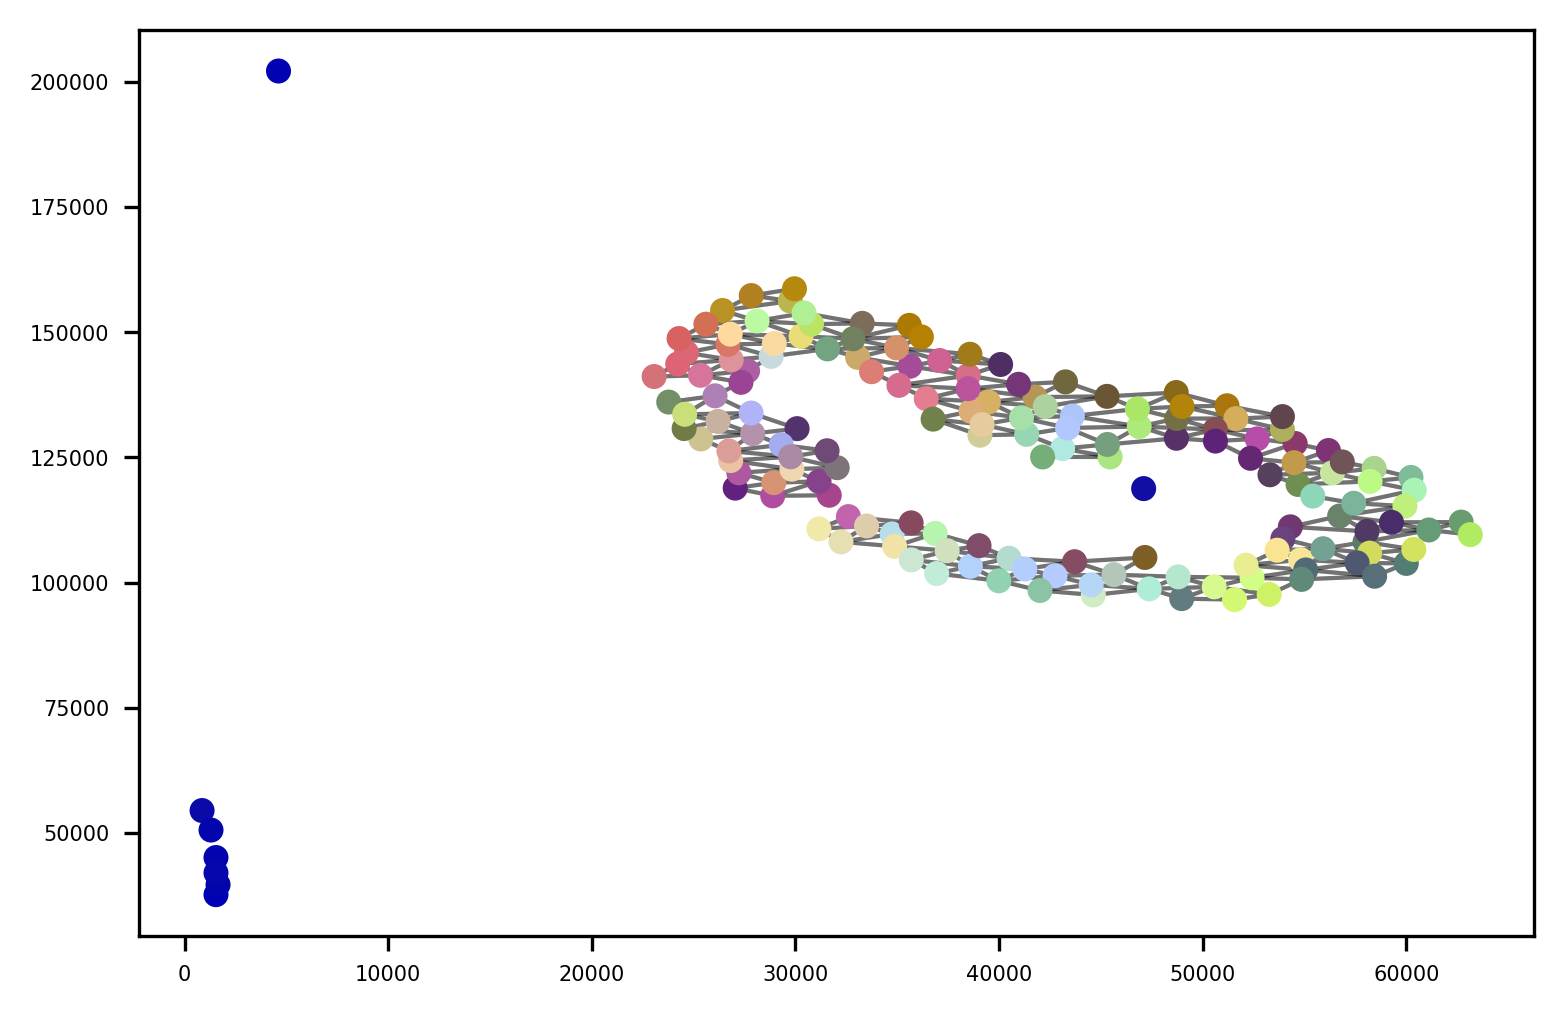

In [ ]:
graph_dict = SlideGraphConstructor.build(positions[:, :2], features, lambda_h=0.99, feature_range_thresh=None)

SlideGraphConstructor.visualise(graph_dict)

plt.show()

In [ ]:
save_path = "/content/drive/MyDrive/Test images/graph.json"
# Write a graph to a JSON file
with open(save_path, "w") as handle:
    graph_dict = {k: v.tolist() for k, v in graph_dict.items()}
    json.dump(graph_dict, handle)

In [ ]:
def load_json(path: str):
    """Load JSON from a file path."""
    with open(path, "r") as fptr:
        json_dict = json.load(fptr)
    return json_dict

In [ ]:
NODE_SIZE = 24
NODE_RESOLUTION = dict(resolution=0.25, units="mpp")
PLOT_RESOLUTION = dict(resolution=4.0, units="mpp")

graph_path = "/content/drive/MyDrive/Test images/graph.json"

graph_dict = load_json(graph_path)
graph_dict = {k: np.array(v) for k, v in graph_dict.items()}
graph = Data(**graph_dict)

# deriving node colors via projecting n-d features down to 3-d
graph.x = StandardScaler().fit_transform(graph.x)
# .c for node colors
node_colors = PCA(n_components=3).fit_transform(graph.x)[:, [1, 0, 2]]
for channel in range(node_colors.shape[-1]):
    node_colors[:, channel] = 1 - equalize_hist(node_colors[:, channel]) ** 2
node_colors = (node_colors * 255).astype(np.uint8)

reader = WSIReader.open(file_path)
thumb = reader.slide_thumbnail(4.0, "mpp")

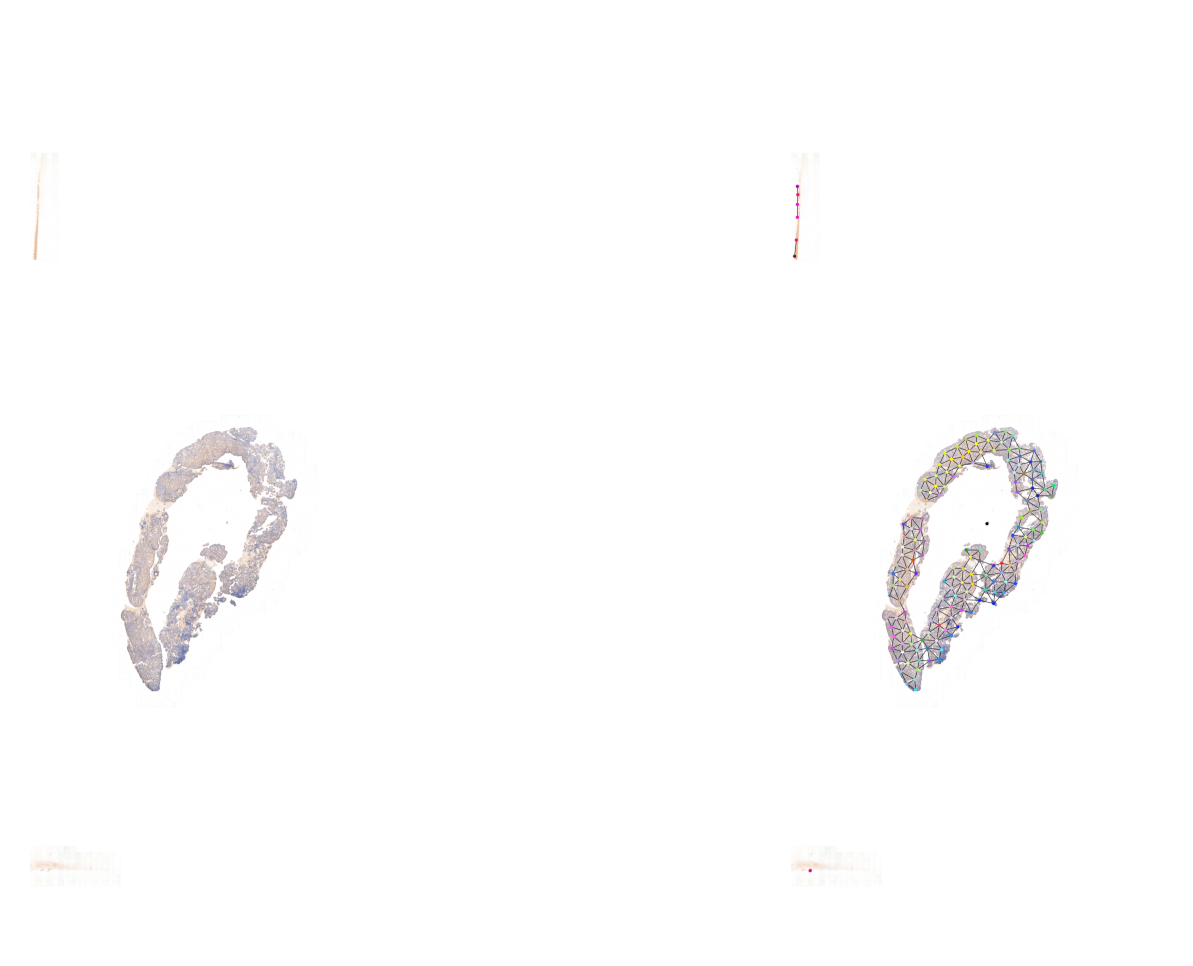

In [ ]:
node_resolution = reader.slide_dimensions(**NODE_RESOLUTION)
plot_resolution = reader.slide_dimensions(**PLOT_RESOLUTION)
fx = np.array(node_resolution) / np.array(plot_resolution)

node_coordinates = np.array(graph.coordinates) / (1.025*fx)
edges = graph.edge_index.T

thumb = reader.slide_thumbnail(**PLOT_RESOLUTION)
thumb_overlaid = plot_graph(
    thumb.copy(), node_coordinates, edges, node_colors=node_colors, node_size=NODE_SIZE
)

plt.subplot(1, 2, 1)
plt.imshow(thumb)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(thumb_overlaid)
plt.axis("off")
plt.show()